In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("./datasets/bike_data.csv", index_col=0)

In [2]:
# Copy this to other notebooks to get the train and test data
def load_train_test():
    train_df = pd.read_csv("./datasets/bike_train.csv", index_col=0)
    test_df = pd.read_csv("./datasets/bike_test.csv", index_col=0)
    X_train = train_df.drop("Count", axis=1).values
    y_train = train_df["Count"]
    X_test = test_df.drop("Count", axis=1).values
    y_test = test_df["Count"]
    return (X_train, X_test, y_train, y_test)

## Train Test Split

In [3]:
X_train, X_test, y_train, y_test = load_train_test()

## Random Forest Models

### Random Forest Basic


In [4]:
from sklearn.metrics import r2_score

# Linear Regression Model basic
from sklearn.ensemble import RandomForestRegressor

LR = RandomForestRegressor(n_jobs=-1)

reg = LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print("R2 score for random forest: ", r2_score(y_test, y_pred))

R2 score for random forest:  0.9091754919448496


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 50

plt.plot(list(y_test[:N]), label="y-test")
plt.plot(list(y_pred[:N]), label="y_pred")
plt.legend()
plt.show()

### Random Forest Variations


In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {  
            'max_features': range(1,22, 4),
            'ccp_alpha': np.linspace(0, 0.04, 5)
} 
grid = GridSearchCV(RandomForestRegressor(), param_grid, verbose=3)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
print("R2 score for random forest (with grid search): ", r2_score(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..................ccp_alpha=0.0, max_features=1; total time=   0.6s
[CV 2/5] END ..................ccp_alpha=0.0, max_features=1; total time=   0.5s
[CV 3/5] END ..................ccp_alpha=0.0, max_features=1; total time=   0.6s
[CV 4/5] END ..................ccp_alpha=0.0, max_features=1; total time=   0.7s
[CV 5/5] END ..................ccp_alpha=0.0, max_features=1; total time=   0.7s
[CV 1/5] END ..................ccp_alpha=0.0, max_features=5; total time=   1.1s
[CV 2/5] END ..................ccp_alpha=0.0, max_features=5; total time=   1.0s
[CV 3/5] END ..................ccp_alpha=0.0, max_features=5; total time=   1.0s
[CV 4/5] END ..................ccp_alpha=0.0, max_features=5; total time=   1.0s
[CV 5/5] END ..................ccp_alpha=0.0, max_features=5; total time=   1.0s
[CV 1/5] END ..................ccp_alpha=0.0, max_features=9; total time=   1.5s
[CV 2/5] END ..................ccp_alpha=0.0, m

[CV 2/5] END .................ccp_alpha=0.03, max_features=9; total time=   2.1s
[CV 3/5] END .................ccp_alpha=0.03, max_features=9; total time=   2.1s
[CV 4/5] END .................ccp_alpha=0.03, max_features=9; total time=   2.1s
[CV 5/5] END .................ccp_alpha=0.03, max_features=9; total time=   2.2s
[CV 1/5] END ................ccp_alpha=0.03, max_features=13; total time=   2.6s
[CV 2/5] END ................ccp_alpha=0.03, max_features=13; total time=   2.5s
[CV 3/5] END ................ccp_alpha=0.03, max_features=13; total time=   2.6s
[CV 4/5] END ................ccp_alpha=0.03, max_features=13; total time=   2.6s
[CV 5/5] END ................ccp_alpha=0.03, max_features=13; total time=   2.7s
[CV 1/5] END ................ccp_alpha=0.03, max_features=17; total time=   3.7s
[CV 2/5] END ................ccp_alpha=0.03, max_features=17; total time=   3.4s
[CV 3/5] END ................ccp_alpha=0.03, max_features=17; total time=   3.2s
[CV 4/5] END ...............

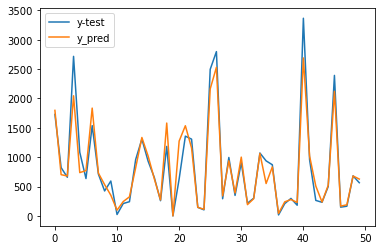

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 50

plt.plot(list(y_test[:N]), label="y-test")
plt.plot(list(y_pred[:N]), label="y_pred")
plt.legend()
plt.show()